In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [49]:
df=pd.read_csv('mall.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


# Exploratory Data Analysis

<AxesSubplot:xlabel='Gender', ylabel='count'>

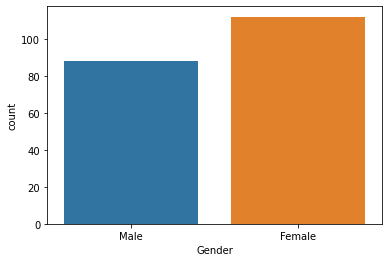

In [9]:
sns.countplot(df['Gender'])

<AxesSubplot:xlabel='Age', ylabel='Density'>

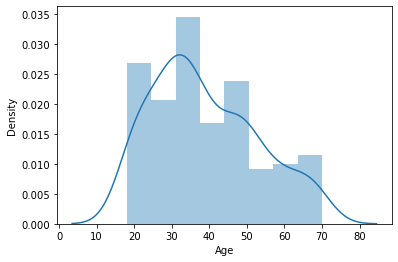

In [10]:
sns.distplot(df['Age'])

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Density'>

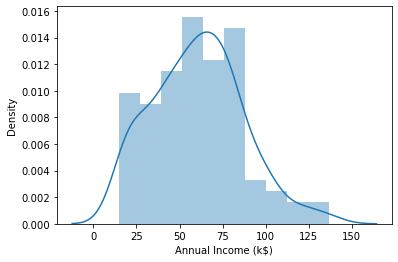

In [11]:
sns.distplot(df['Annual Income (k$)'])

<AxesSubplot:xlabel='Spending Score (1-100)', ylabel='Density'>

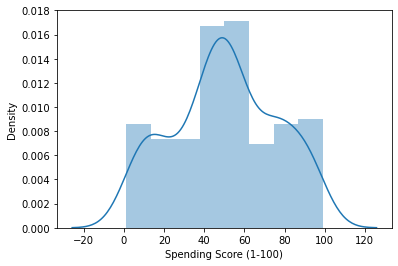

In [12]:
sns.distplot(df['Spending Score (1-100)'])

# Correlation Matrix

<AxesSubplot:>

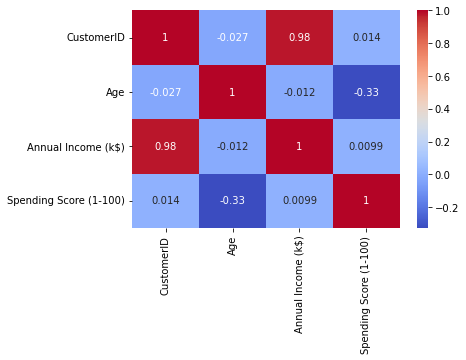

In [13]:
corr=df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

# Clustering

In [14]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [15]:
df1=df[['Annual Income (k$)','Spending Score (1-100)']]
df1.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

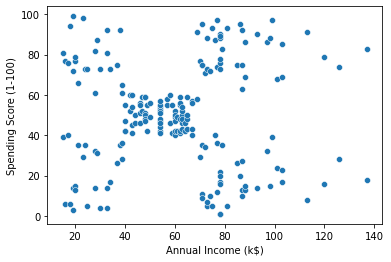

In [16]:
sns.scatterplot(df1['Annual Income (k$)'],df1['Spending Score (1-100)'])

In [18]:
from sklearn.cluster import KMeans
errors=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df1)
    errors.append(kmeans.inertia_)

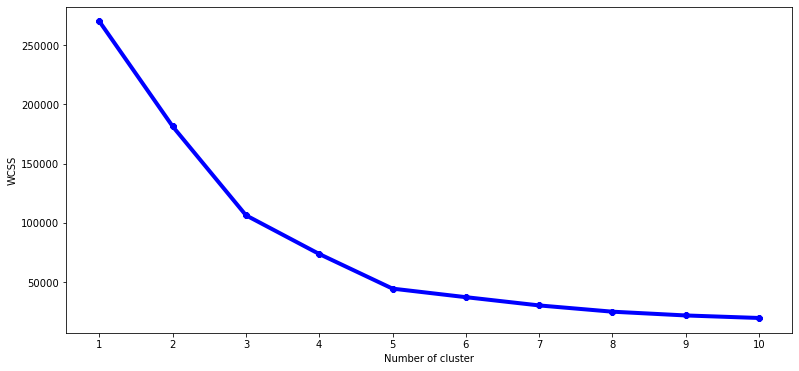

In [26]:
plt.figure(figsize=(13,6))
plt.plot(range(1,11),errors)
plt.plot(range(1,11),errors,linewidth=4,color='blue',marker='8')
plt.xlabel('Number of cluster')
plt.ylabel('WCSS')
plt.xticks(np.arange(1,11,1))
plt.show()

In [27]:
km=KMeans(n_clusters=5)
km.fit(df1)
y=km.predict(df1)
df1['Label']=y
df1.head()

,Annual Income (k$),Spending Score (1-100),Label
0,15,39,0
1,15,81,3
2,16,6,0
3,16,77,3
4,17,40,0


<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

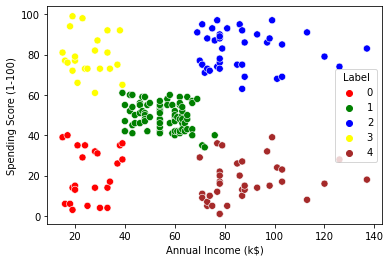

In [29]:
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)',data=df1,hue='Label',s=50,palette=['red','green','blue','yellow','brown'])

In [50]:
df2=df[['Annual Income (k$)', 'Spending Score (1-100)','Age']]
df2.head()

,Annual Income (k$),Spending Score (1-100),Age
0,15,39,19
1,15,81,21
2,16,6,20
3,16,77,23
4,17,40,31


In [31]:
errors=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df2)
    errors.append(kmeans.inertia_)

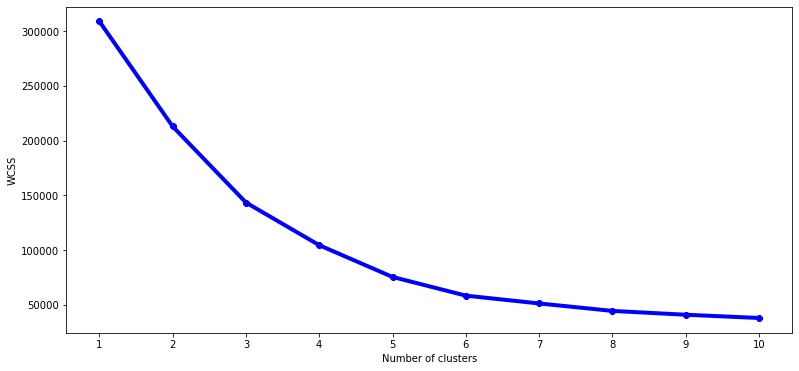

In [32]:
plt.figure(figsize=(13,6))
plt.plot(range(1,11),errors)
plt.plot(range(1,11),errors,linewidth=4,color='blue',marker='8')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.xticks(np.arange(1,11,1))
plt.show()

In [51]:
km=KMeans(n_clusters=5)
km.fit(df2)
y=km.predict(df2)
df2['Label']=y
df2.head()

,Annual Income (k$),Spending Score (1-100),Age,Label
0,15,39,19,0
1,15,81,21,1
2,16,6,20,0
3,16,77,23,1
4,17,40,31,0


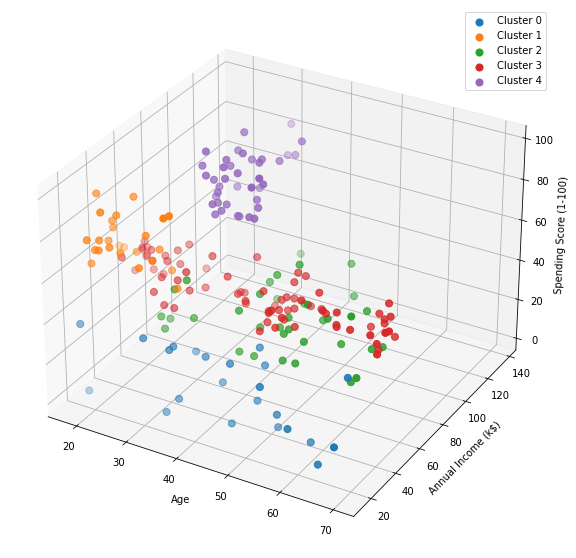

In [52]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111, projection='3d')

for label in range(5):
    cluster_data = df2[df2['Label'] == label]
    ax.scatter(cluster_data['Age'], cluster_data['Annual Income (k$)'], cluster_data['Spending Score (1-100)'],
               label=f'Cluster {label}', s=50)

ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
plt.legend()
plt.show()
